In [34]:
library(tidyverse)
library(plyr)
library(modeest)
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(gridExtra)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
path = "../input/hepatitis/hepatitis.csv"
columns = c("class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology")
data = read.csv(path, header = F, sep=",", col.names = columns)

In [36]:
head(data)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
2,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
3,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
4,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
6,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [37]:
tail(data)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
150,2,36,1,2,2,2,2,2,2,2,2,2,2,2,0.60,120,30,4.0,?,2
151,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
152,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
153,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
154,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
155,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [38]:
# inspección rápida de los datos
summary(data)

     class            age            sex        steroid   antivirals    fatigue
 Min.   :1.000   Min.   : 7.0   Min.   :1.000   ?: 1    Min.   :1.000   ?:  1  
 1st Qu.:2.000   1st Qu.:32.0   1st Qu.:1.000   1:76    1st Qu.:2.000   1:100  
 Median :2.000   Median :39.0   Median :1.000   2:78    Median :2.000   2: 54  
 Mean   :1.794   Mean   :41.2   Mean   :1.103           Mean   :1.845          
 3rd Qu.:2.000   3rd Qu.:50.0   3rd Qu.:1.000           3rd Qu.:2.000          
 Max.   :2.000   Max.   :78.0   Max.   :2.000           Max.   :2.000          
                                                                               
 malaise anorexia liver_big liver_firm spleen_palpable spiders ascites varices
 ?: 1    ?:  1    ?: 10     ?:11       ?:  5           ?: 5    ?:  5   ?:  5  
 1:61    1: 32    1: 25     1:60       1: 30           1:51    1: 20   1: 18  
 2:93    2:122    2:120     2:84       2:120           2:99    2:130   2:132  
                                            

In [39]:
# revisamos el tipo de datos del df generado
str(data)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 3 levels "?","1","2": 2 2 3 1 3 3 2 3 3 3 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 3 levels "?","1","2": 3 2 2 3 3 3 2 3 2 3 ...
 $ malaise        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3 3 ...
 $ anorexia       : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ liver_big      : Factor w/ 3 levels "?","1","2": 2 2 3 3 3 3 3 3 3 3 ...
 $ liver_firm     : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 2 3 ...
 $ spleen_palpable: Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ spiders        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ ascites        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3 3 ...
 $ varices        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3

In [40]:
#Número de filas
nrow(data)

[1] 155

In [41]:
#Número de columnas
ncol(data)

[1] 20

In [42]:
# Estadística descriptiva
library(ggplot2)

# Distribuciones

## Diagnóstico final de pacientes

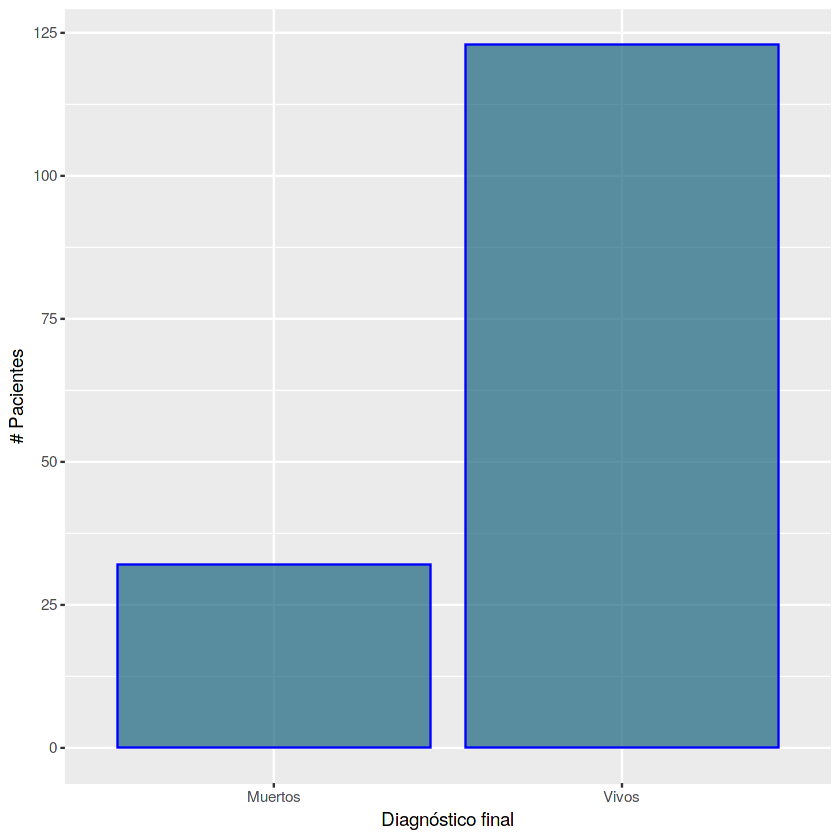

In [43]:
ggplot(data, aes(x=as.factor(class) )) +
  geom_bar(color="blue", fill=rgb(0.1,0.4,0.5,0.7) ) +
  labs(x = "Diagnóstico final",
         y = "# Pacientes",
         color = "Legend")+
  scale_x_discrete(breaks=c("1","2"),
        labels=c("Muertos", "Vivos"))

## Distribución de género

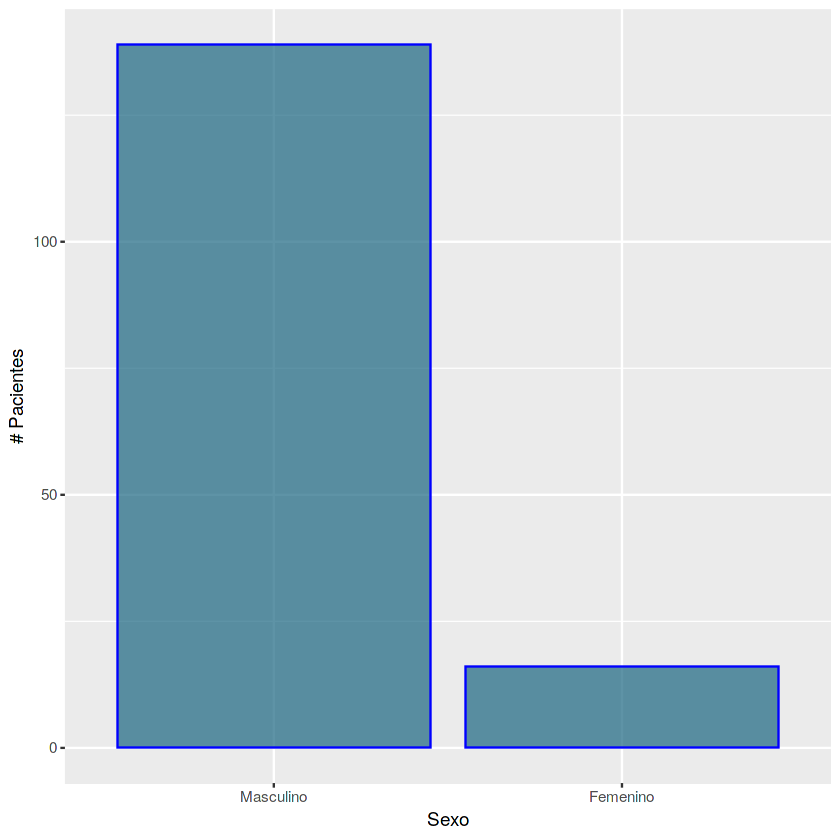

In [44]:
ggplot(data, aes(x=as.factor(sex) )) +
  geom_bar(color="blue", fill=rgb(0.1,0.4,0.5,0.7) ) +
  labs(x = "Sexo",
         y = "# Pacientes",
         color = "Legend")+
  scale_x_discrete(breaks=c("1","2"),
        labels=c("Masculino", "Femenino"))


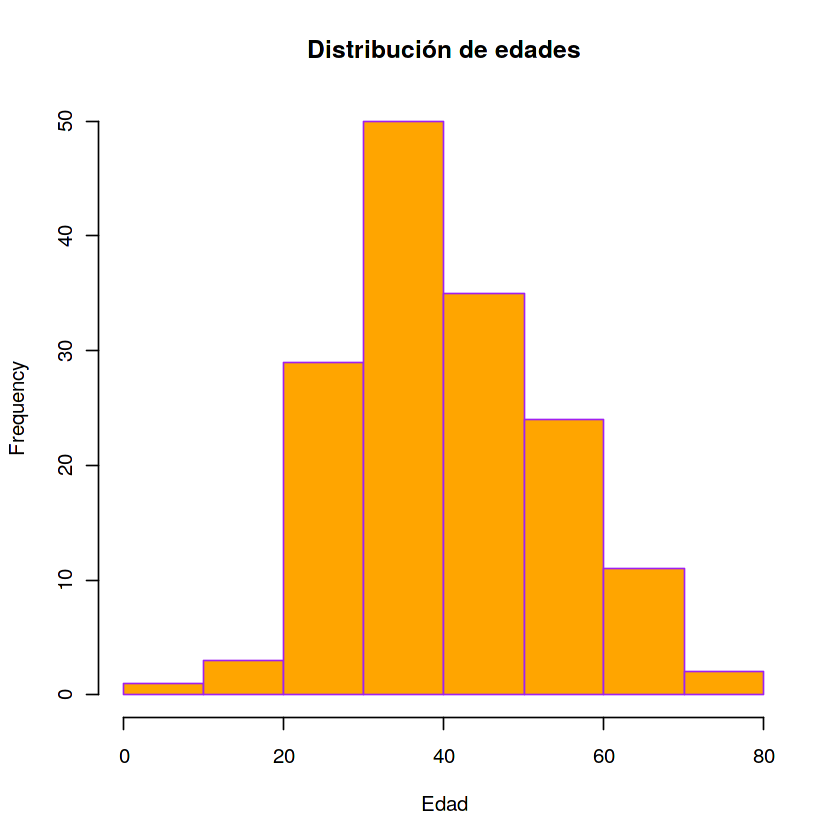

In [45]:
hist(data$age, breaks=6, main = "Distribución de edades", 
     xlab = "Edad", border = "purple", 
     col = "orange",)

In [46]:
# Preprocesado
filas_a_conservar <-c(data$bilirubin!="?")
# Se eliminaron las fila sin datos
new_data <- data[filas_a_conservar,]
# Se elimina el valor "?"
new_data <- droplevels(new_data)
#str(new_data)

alk_data <- droplevels(data[c(data$alk_phosphate!="?"),])
sgot_data <- droplevels(data[c(data$sgot!="?"),])
albumin_data <- droplevels(data[c(data$albumin!="?"),])
protime_data <- droplevels(data[c(data$protime!="?"),])

In [47]:
# Análisis descriptivo
## Función: GRÁFICO DE CAJA ##
plot.box<-function(
  table,
  x,
  y,
  xlab,
  ylab,
  tittle
){
  ggboxplot(
    table, x = x, y = y,
    color = x, 
    palette = c("#00AFBB", "#E7B800", "#FC4E07"),
    xlab = xlab,
    add = "jitter",
    ylab = ylab
  ) + scale_x_discrete(
      breaks=c("1","2"),
      labels=c("Muertos", "Vivos"))
}

In [48]:
## Función: HISTGRAMA
plot.hist<-function(
  data,
  x,
  xlab,
  ylab,
  x1lab,
  x2lab,
  tittle
){
  ggplot(data, aes(x = x))+ 
    geom_bar(
      color="blue", fill=rgb(0.1,0.4,0.5,0.7)
    )+
    labs(fill = "Votos")+
    labs(x = xlab,y = ylab)+
    scale_x_discrete(breaks=c("1","2"),
                     labels=c(x1lab,x2lab))
}

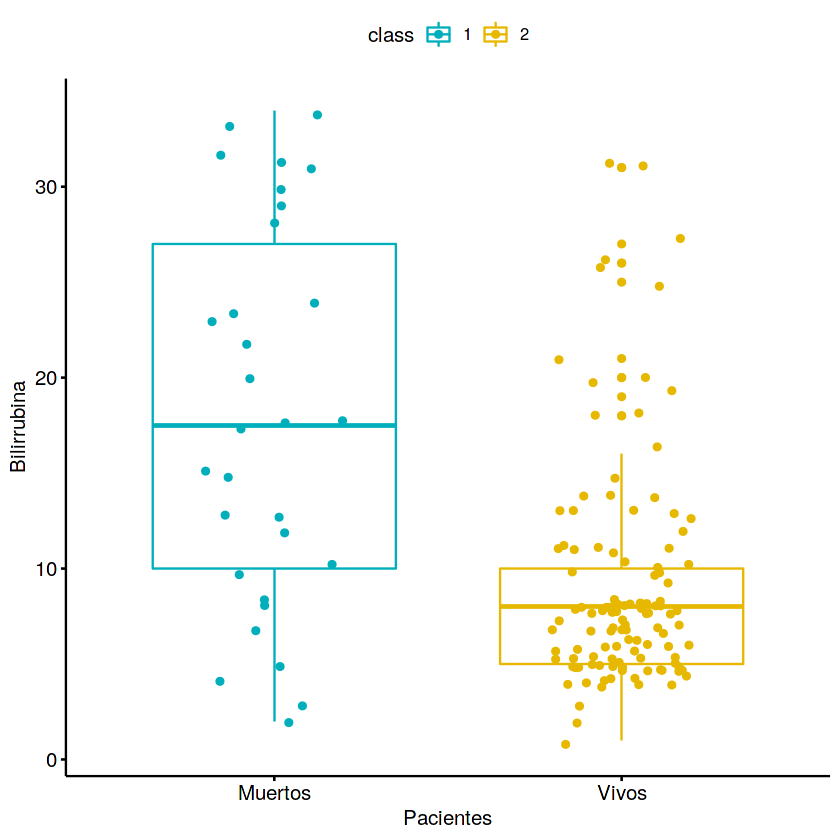

In [49]:
# Análisis descriptivo
### Variables/atributos numéricos
#### Grafico pacientes vivos y muertos de acuerdo a la cantidad de bilirrubina 
class <- c(new_data$class)
bilirubin <- c(new_data$bilirubin)

#class2 <- c(alk_data$class)
#alk <- c(alk_data$alk_phosphate)

#class3 <- c(sgot_data$class)
#sgot <- c(sgot_data$sgot)

#class4 <- c(albumin_data$class)
#albumin <- c(albumin_data$albumin)

#class5 <- c(protime_data$class)
#protime <- c(protime_data$protime)

#class6 <- c(data$class)
#age <- c(data$age)

table <- data.frame('class'= class, 'bilirubin'= bilirubin)
#table2 <- data.frame('class2'= class2, 'alk'= alk)
#table3 <- data.frame('class3'= class3, 'sgot'= sgot)
#table4 <- data.frame('class4'= class4, 'albumin'= albumin)
#table5 <- data.frame('class5'= class5, 'protime'= protime)
#table6 <- data.frame('class6'= class6, 'age'= age)

#layout(matrix(c(1:6), nrow=2, byrow=FALSE))
plot.box(table, "class","bilirubin","Pacientes","Bilirrubina", "Grafico 1")
#plot.box(table2, "class2","alk","Pacientes","Fosfatasa alcalina", "Grafico 2")
#plot.box(table3, "class3","sgot","Pacientes","Aspartato aminotransferasa", "Grafico 3")
#plot.box(table4, "class4","albumin","Pacientes","Albúmina", "Grafico 4")
#plot.box(table5, "class5","protime","Pacientes","Protrombina", "Grafico 5")
#plot.box(table6, "class6","age","Pacientes","Edad", "Grafico 6")

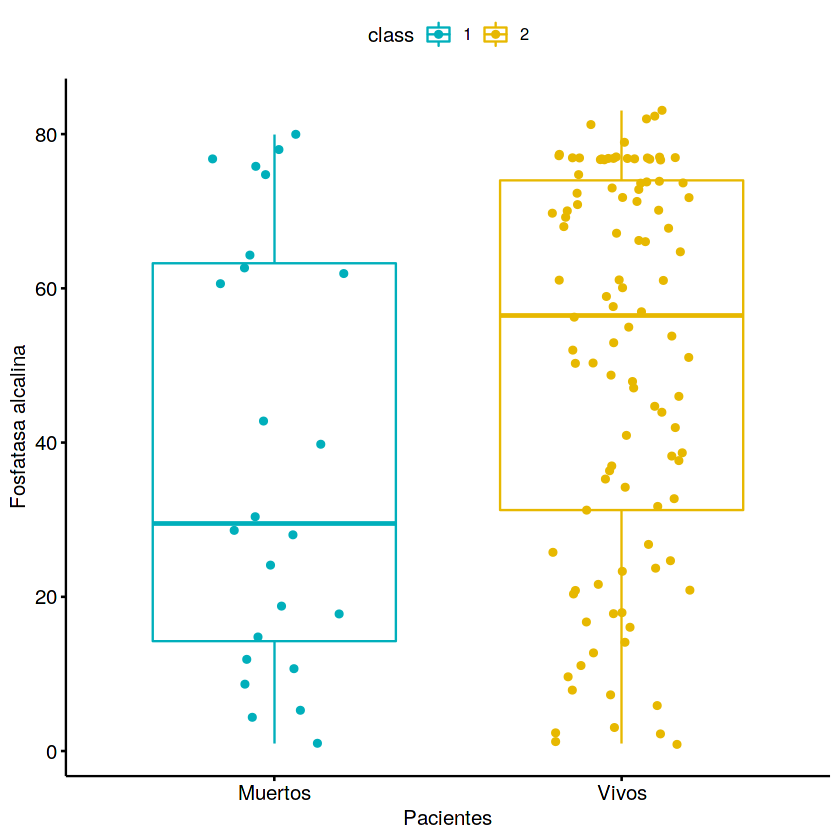

In [50]:
#### Grafico pacientes vivos y muertos de acuerdo a la cantidad de Fosfatasa alcalina
## --alk phosphatase
class <- c(alk_data$class)
alk <- c(alk_data$alk_phosphate)

table <- data.frame('class'= class, 'alk'= alk)
plot.box(table, "class","alk","Pacientes","Fosfatasa alcalina", "Grafico 2")

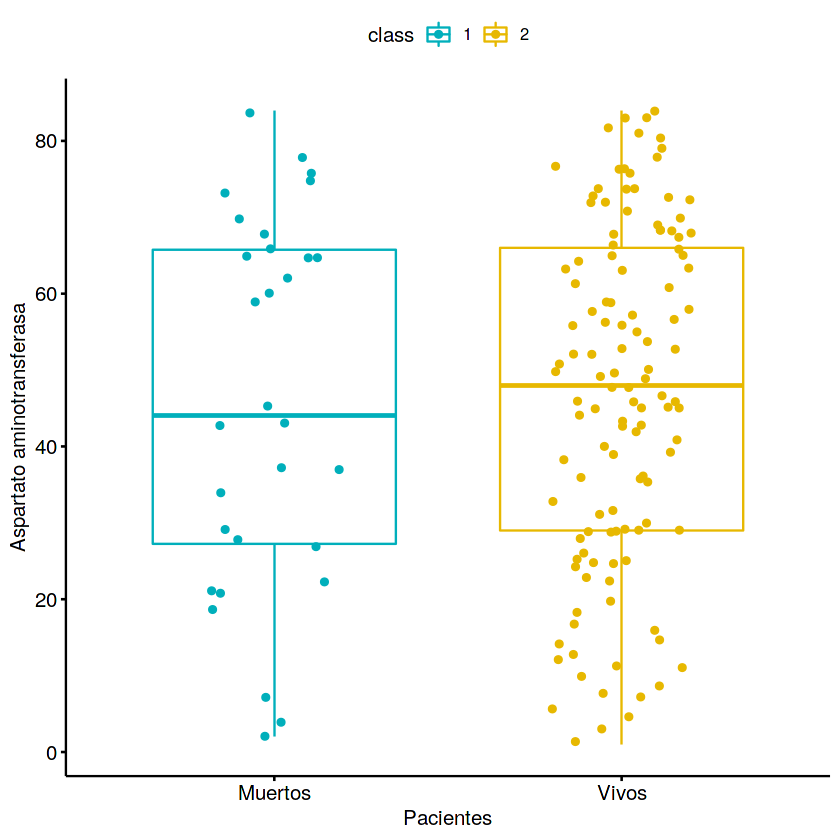

In [51]:
#### Grafico pacientes vivos y muertos de acuerdo a la cantidad de Aspartato aminotransferasa
## --sgot
class <- c(sgot_data$class)
sgot <- c(sgot_data$sgot)

table <- data.frame('class'= class, 'sgot'= sgot)
plot.box(table, "class","sgot","Pacientes","Aspartato aminotransferasa", "Grafico 3")

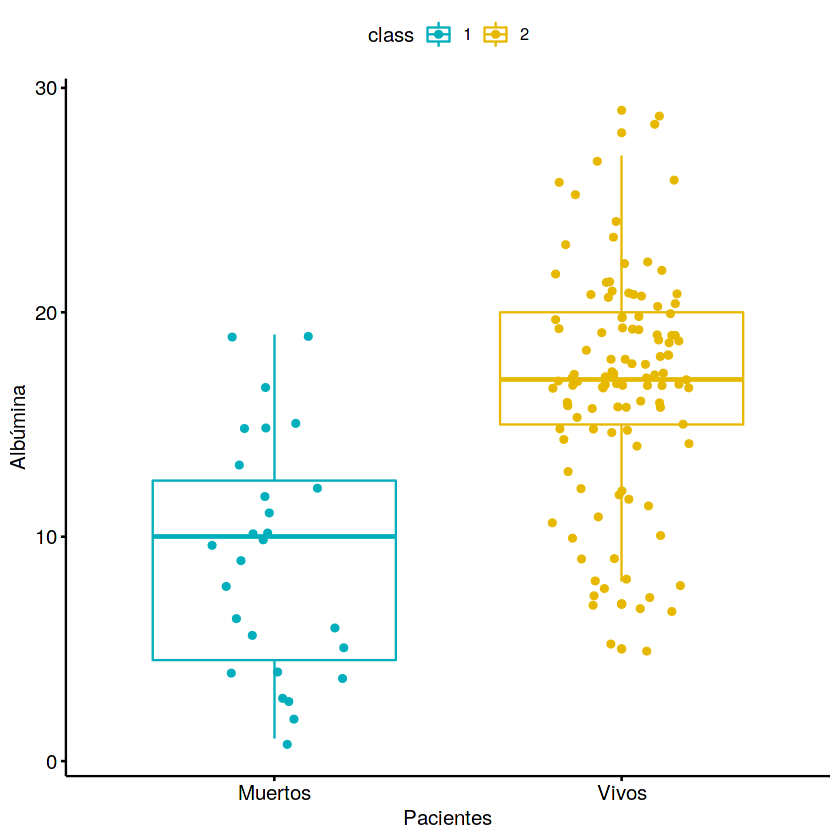

In [52]:
#### Grafico pacientes vivos y muertos de acuerdo a la cantidad de Albúmina
## --albumin
class <- c(albumin_data$class)
albumin <- c(albumin_data$albumin)

table <- data.frame('class'= class, 'albumin'= albumin)
plot.box(table, "class","albumin","Pacientes","Albúmina", "Grafico 4")

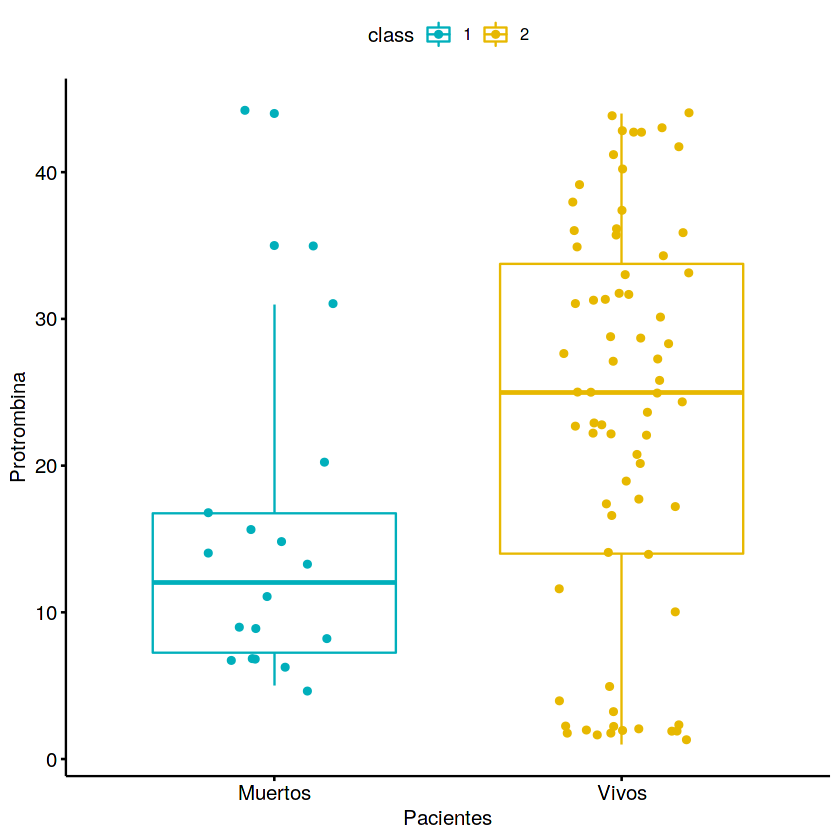

In [53]:
#### Grafico pacientes vivos y muertos de acuerdo a la cantidad de Protrombina
## --protime  --Prothrombin
class <- c(protime_data$class)
protime <- c(protime_data$protime)

table <- data.frame('class'= class, 'protime'= protime)
plot.box(table, "class","protime","Pacientes","Protrombina", "Grafico 5")

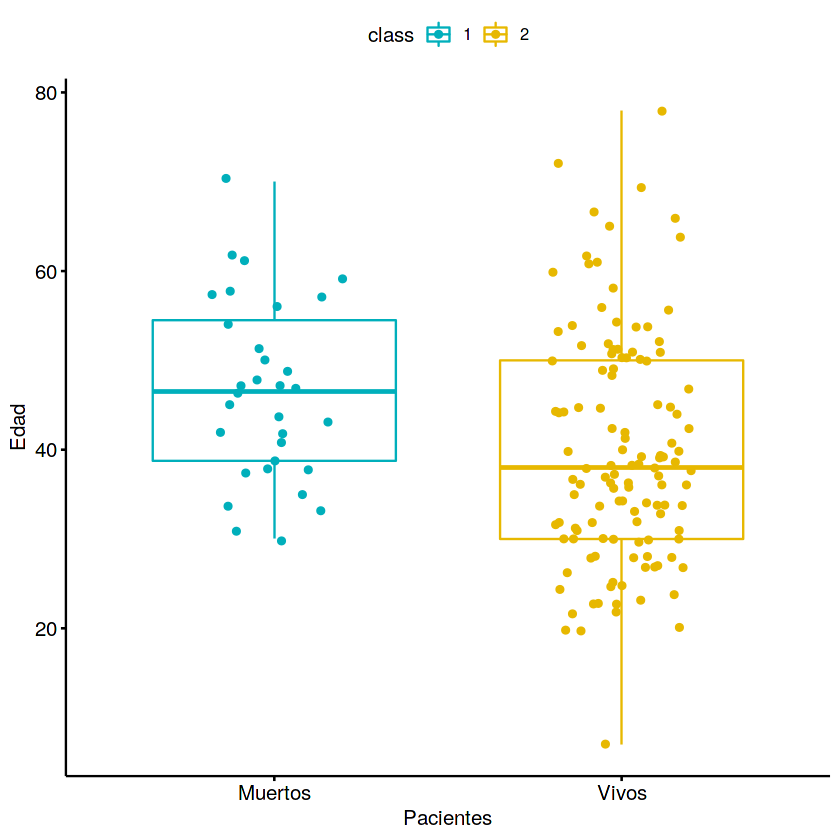

In [54]:
#### Grafico pacientes vivos y muertos de acuerdo a la edad
## --age
class <- c(data$class)
age <- c(data$age)

table <- data.frame('class'= class, 'age'= age)
plot.box(table, "class","age","Pacientes","Edad", "Grafico 6")

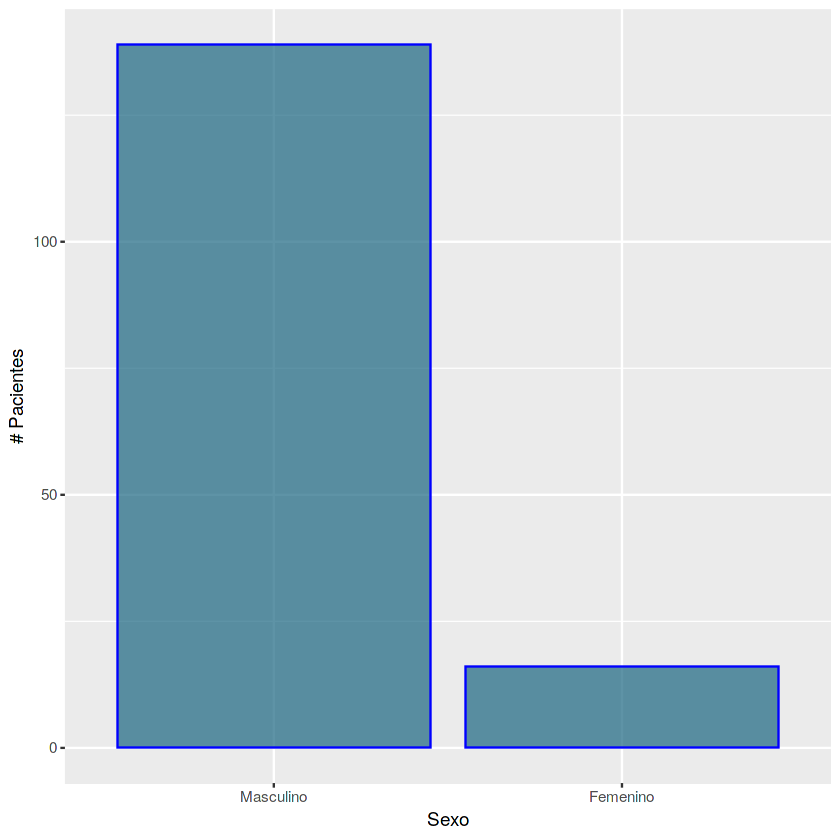

In [55]:
# Análisis descriptivo
### Variables/atributos categoricos
#### Grafico pacientes vivos y muertos de acuerdo al sexo
plot.hist(data,as.factor(data$sex),"Sexo","# Pacientes", "Masculino", "Femenino", "Grafico 7")

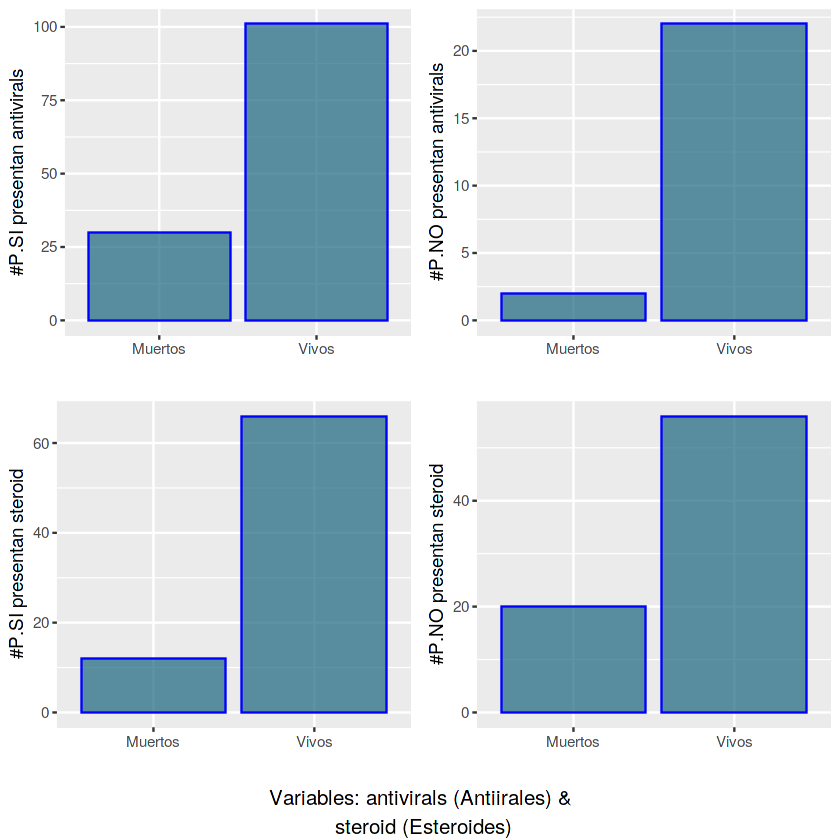

In [56]:
steroid_data <- droplevels(data[c(data$steroid!="?"),])

no_antivirals <- droplevels(data[c(data$antivirals==1),])
si_antivirals <- droplevels(data[c(data$antivirals==2),])

no_steroid <- droplevels(steroid_data[c(steroid_data$steroid==1),])
si_steroid <- droplevels(steroid_data[c(steroid_data$steroid==2),])

grid.arrange(
plot.hist(si_antivirals,as.factor(si_antivirals$class),"","#P.SI presentan antivirals", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_antivirals,as.factor(no_antivirals$class),"","#P.NO presentan antivirals", "Muertos", "Vivos", "Grafico 9"),
plot.hist(si_steroid,as.factor(si_steroid$class),"","#P.SI presentan steroid", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_steroid,as.factor(no_steroid$class),"","#P.NO presentan steroid", "Muertos", "Vivos", "Grafico 9"),
ncol = 2,
bottom="Variables: antivirals (Antiirales) &\n steroid (Esteroides)")

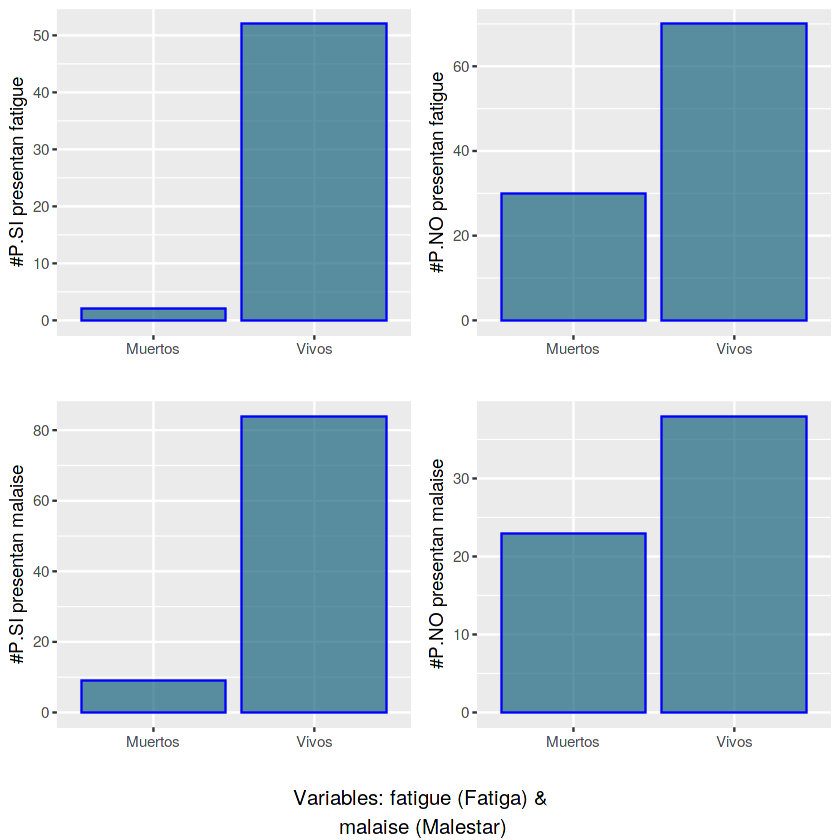

In [57]:
fatigue_data <- droplevels(data[c(data$fatigue!="?"),])
malaise_data <- droplevels(data[c(data$malaise!="?"),])

no_fatigue <- droplevels(fatigue_data[c(fatigue_data$fatigue==1),])
si_fatigue <- droplevels(fatigue_data[c(fatigue_data$fatigue==2),])

no_malaise <- droplevels(malaise_data[c(malaise_data$malaise==1),])
si_malaise <- droplevels(malaise_data[c(malaise_data$malaise==2),])

grid.arrange(
plot.hist(si_fatigue,as.factor(si_fatigue$class),"","#P.SI presentan fatigue", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_fatigue,as.factor(no_fatigue$class),"","#P.NO presentan fatigue", "Muertos", "Vivos", "Grafico 9"),
plot.hist(si_malaise,as.factor(si_malaise$class),"","#P.SI presentan malaise", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_malaise,as.factor(no_malaise$class),"","#P.NO presentan malaise", "Muertos", "Vivos", "Grafico 9"),
ncol = 2,
bottom="Variables: fatigue (Fatiga) &\n malaise (Malestar)"
)

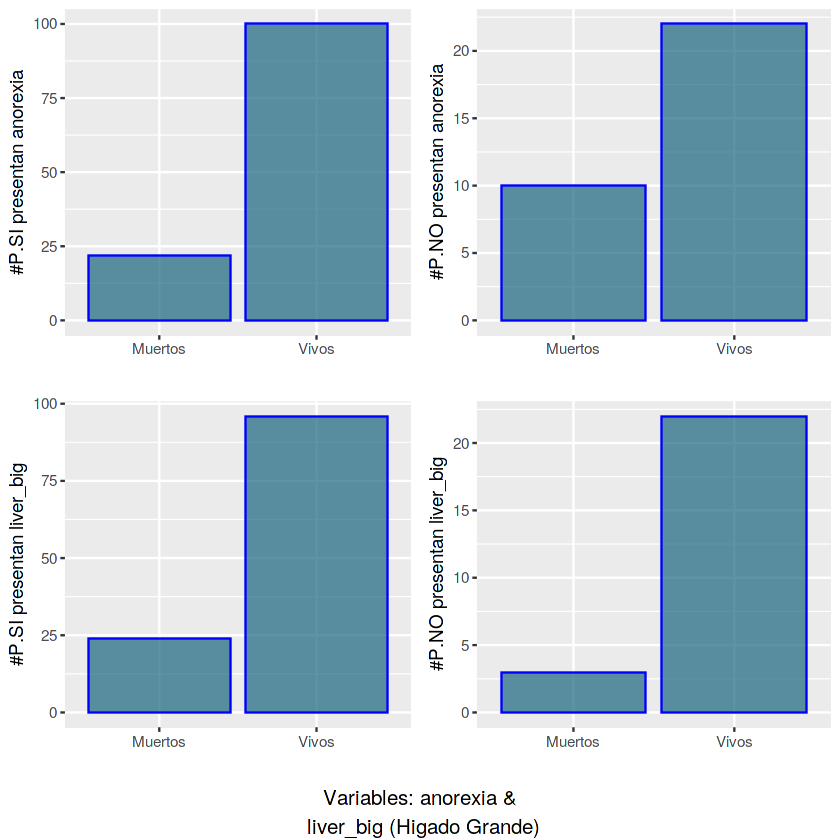

In [58]:
anorexia_data <- droplevels(data[c(data$anorexia!="?"),])
liver_big_data <- droplevels(data[c(data$liver_big!="?"),])

no_anorexia <- droplevels(anorexia_data[c(anorexia_data$anorexia==1),])
si_anorexia <- droplevels(anorexia_data[c(anorexia_data$anorexia==2),])

no_liver_big <- droplevels(liver_big_data[c(liver_big_data$liver_big==1),])
si_liver_big <- droplevels(liver_big_data[c(liver_big_data$liver_big==2),])

grid.arrange(
plot.hist(si_anorexia,as.factor(si_anorexia$class),"","#P.SI presentan anorexia", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_anorexia,as.factor(no_anorexia$class),"","#P.NO presentan anorexia", "Muertos", "Vivos", "Grafico 9"),
plot.hist(si_liver_big,as.factor(si_liver_big$class),"","#P.SI presentan liver_big", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_liver_big,as.factor(no_liver_big$class),"","#P.NO presentan liver_big", "Muertos", "Vivos", "Grafico 9"),
ncol = 2,
bottom="Variables: anorexia &\n liver_big (Higado Grande)"
)

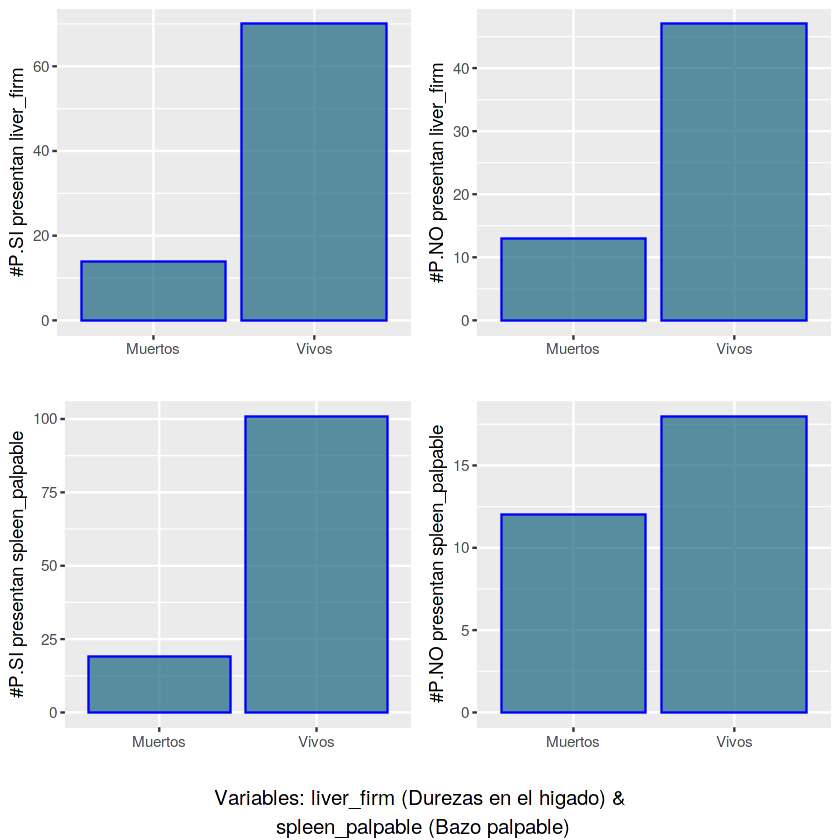

In [59]:
liver_firm_data <- droplevels(data[c(data$liver_firm!="?"),])
spleen_palpable_data <- droplevels(data[c(data$spleen_palpable!="?"),])

no_liver_firm <- droplevels(liver_firm_data[c(liver_firm_data$liver_firm==1),])
si_liver_firm <- droplevels(liver_firm_data[c(liver_firm_data$liver_firm==2),])

no_spleen_palpable <- droplevels(spleen_palpable_data[c(spleen_palpable_data$spleen_palpable==1),])
si_spleen_palpable <- droplevels(spleen_palpable_data[c(spleen_palpable_data$spleen_palpable==2),])

grid.arrange(
plot.hist(si_liver_firm,as.factor(si_liver_firm$class),"","#P.SI presentan liver_firm", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_liver_firm ,as.factor(no_liver_firm $class),"","#P.NO presentan liver_firm", "Muertos", "Vivos", "Grafico 9"),
plot.hist(si_spleen_palpable,as.factor(si_spleen_palpable$class),"","#P.SI presentan spleen_palpable", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_spleen_palpable,as.factor(no_spleen_palpable$class),"","#P.NO presentan spleen_palpable", "Muertos", "Vivos", "Grafico 9"),
ncol = 2,
bottom="Variables: liver_firm (Durezas en el higado) &\n spleen_palpable (Bazo palpable)"
)

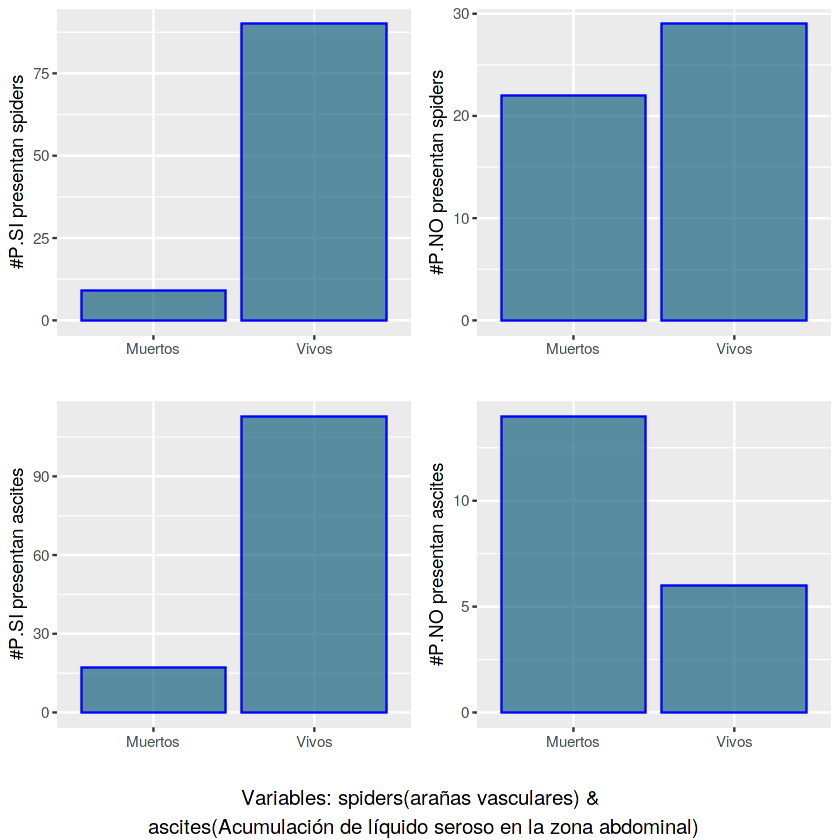

In [60]:
spiders_data <- droplevels(data[c(data$spiders!="?"),])
ascites_data <- droplevels(data[c(data$ascites!="?"),])

no_ascites <- droplevels(ascites_data[c(ascites_data$ascites==1),])
si_ascites <- droplevels(ascites_data[c(ascites_data$ascites==2),])

no_spiders <- droplevels(spiders_data[c(spiders_data$spiders==1),])
si_spiders <- droplevels(spiders_data[c(spiders_data$spiders==2),])

grid.arrange(
plot.hist(si_spiders,as.factor(si_spiders$class),"","#P.SI presentan spiders", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_spiders,as.factor(no_spiders$class),"","#P.NO presentan spiders", "Muertos", "Vivos", "Grafico 9"),
plot.hist(si_ascites,as.factor(si_ascites$class),"","#P.SI presentan ascites", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_ascites,as.factor(no_ascites$class),"","#P.NO presentan ascites", "Muertos", "Vivos", "Grafico 9"),
ncol = 2,
bottom="Variables: spiders(arañas vasculares) &\n ascites(Acumulación de líquido seroso en la zona abdominal)"
)
#plot.hist(spiders_data,spiders_data$spiders,"Arañas vasculares","# Pacientes", "No", "Si", "Grafico 9")

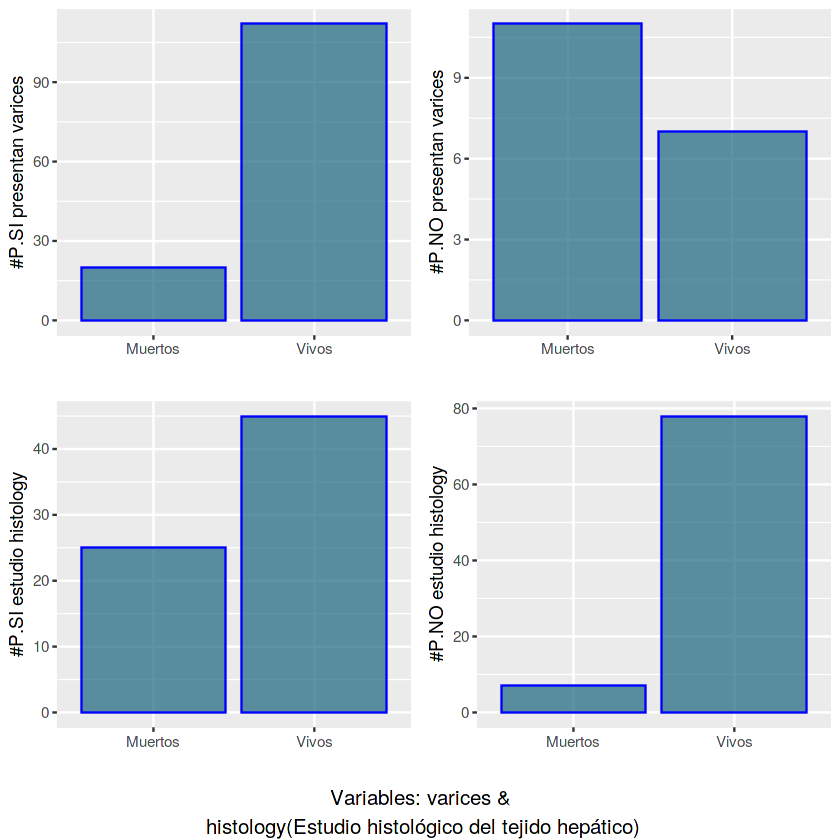

In [61]:
varices_data <- droplevels(data[c(data$varices!="?"),])
histology_data <- droplevels(data[c(data$histology!="?"),])

no_varices <- droplevels(varices_data[c(varices_data$varices==1),])
si_varices <- droplevels(varices_data[c(varices_data$varices==2),])

no_histology <- droplevels(histology_data[c(histology_data$histology==1),])
si_histology <- droplevels(histology_data[c(histology_data$histology==2),])

grid.arrange(
plot.hist(si_varices,as.factor(si_varices$class),"","#P.SI presentan varices", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_varices,as.factor(no_varices$class),"","#P.NO presentan varices", "Muertos", "Vivos", "Grafico 9"),
plot.hist(si_histology,as.factor(si_histology$class),"","#P.SI estudio histology", "Muertos", "Vivos", "Grafico 9"),
plot.hist(no_histology,as.factor(no_histology$class),"","#P.NO estudio histology", "Muertos", "Vivos", "Grafico 9"),
ncol = 2,
bottom="Variables: varices &\n histology(Estudio histológico del tejido hepático)"
)

In [62]:
convertToNumeric <- function(col){
    col <- as.numeric(levels(col))[col]
    return (col)
}

In [63]:
convertToInt <- function(col){
    col <- as.integer(levels(col))[col]
    return (col)
}

In [64]:
parsingNA <- function(col){
     if(is.factor(col)){
        col <- revalue(col, c("?" = NA))
     }
    if(nlevels(col) > 2){
        col <- as.numeric(levels(col))[col]
    }
    return (col)
}

In [65]:
# Creamos un backup
dataHip <- data

In [66]:
# Recorremos cada columna para reemplazar los símbolos ? y dejarlos como NA
# Esto con el objeto de que Mice pueda reeconocer los datos perdidos y aplicar los métodos correspondientes.
for(i in names(dataHip)){
  dataHip[[i]] <- parsingNA(dataHip[[i]])
}

In [67]:
#Chequeamos la cantidad de datos perdidos
colSums(is.na(dataHip))

class             age             sex         steroid      antivirals 
              0               0               0               1               0 
        fatigue         malaise        anorexia       liver_big      liver_firm 
              1               1               1              10              11 
spleen_palpable         spiders         ascites         varices       bilirubin 
              5               5               5               5               6 
  alk_phosphate            sgot         albumin         protime       histology 
             29               4              16              67               0

In [68]:
str(dataHip)
#Vemos que los niveles de los factor han disminuido, conforme a la transformación.

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 2 levels "1","2": 1 1 2 NA 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 2 levels "1","2": 2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0

In [69]:
# Aplicamos la imputación
# Poster
library(mice)
init = mice(dataHip, maxit=0) 
meth = init$method
# Descartamos estos atributos para la imputación
meth[c("age", "class", "sex", "antivirals", "histology")]=""
# Se aplica método de regresión logística para atributos con 2 niveles
meth[c("steroid", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices")]="logreg"
# Se aplica método de regresión logística politómica
meth[c("bilirubin", "alk_phosphate", "sgot", "albumin", "protime")]="norm"
predM = init$predictorMatrix
set.seed(103)
imputed = mice(dataHip, method=meth, predictorMatrix=predM, m=5)


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind





 iter imp variable
  1   1  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   2  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   3  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   4  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   5  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  2   1  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  2   2 

In [70]:
dataImputed <- complete(imputed)
dataImputedNonConverted <- dataImputed

In [71]:
summary(dataImputed)

     class            age            sex        steroid   antivirals    fatigue
 Min.   :1.000   Min.   : 7.0   Min.   :1.000   1:76    Min.   :1.000   1:100  
 1st Qu.:2.000   1st Qu.:32.0   1st Qu.:1.000   2:79    1st Qu.:2.000   2: 55  
 Median :2.000   Median :39.0   Median :1.000           Median :2.000          
 Mean   :1.794   Mean   :41.2   Mean   :1.103           Mean   :1.845          
 3rd Qu.:2.000   3rd Qu.:50.0   3rd Qu.:1.000           3rd Qu.:2.000          
 Max.   :2.000   Max.   :78.0   Max.   :2.000           Max.   :2.000          
 malaise anorexia liver_big liver_firm spleen_palpable spiders ascites varices
 1:61    1: 33    1: 29     1:65       1: 31           1: 54   1: 22   1: 20  
 2:94    2:122    2:126     2:90       2:124           2:101   2:133   2:135  
                                                                              
                                                                              
                                             

In [72]:
str(dataImputed)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 2 levels "1","2": 2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0.

In [73]:
# Convertimos los atributos que son categóricos a enteros
for(i in names(dataImputed)){
  if(is.factor(dataImputed[[i]])){
      dataImputed[[i]] <- convertToInt(dataImputed[[i]])
  }
}

In [74]:
dataDeath = dataImputed %>% filter(class==1)
dataLive = dataImputed %>% filter(class==2) 
albuminDeath <- dataDeath$albumin
albuminLive <- dataLive$albumin
wilcox.test(albuminDeath, albuminLive)


	Wilcoxon rank sum test with continuity correction

data:  albuminDeath and albuminLive
W = 638, p-value = 3.758e-09
alternative hypothesis: true location shift is not equal to 0


In [75]:
biliDeath <- dataDeath$bilirubin
biliLive <- dataLive$bilirubin

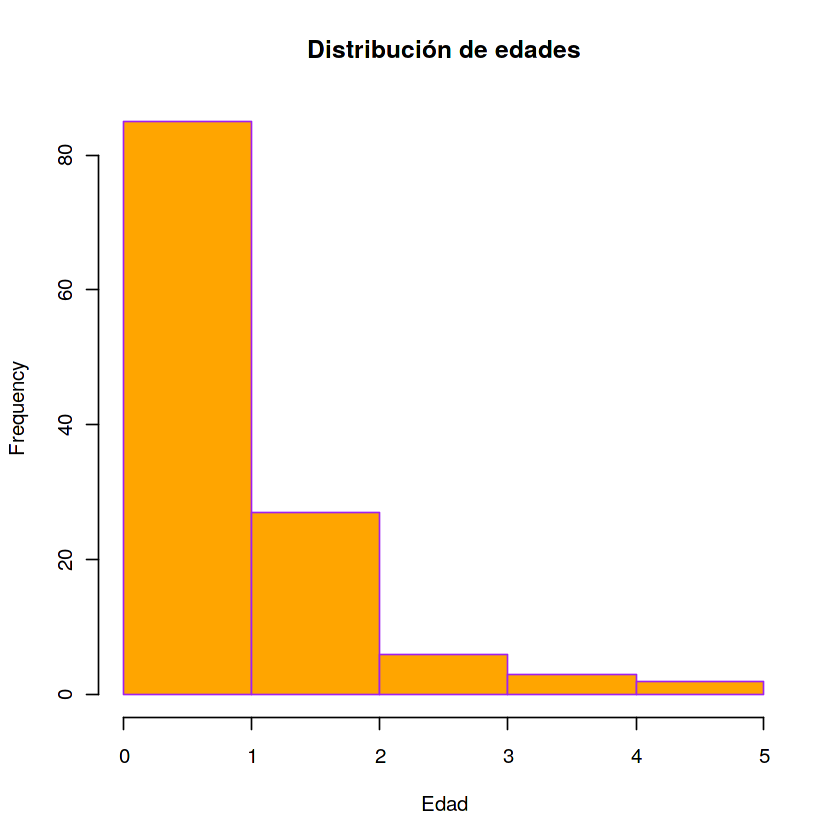

In [76]:
hist(biliLive, breaks=6, main = "Distribución de edades", 
     xlab = "Edad", border = "purple", 
     col = "orange",)

In [77]:
shapiro.test(biliLive)
shapiro.test(biliDeath)


	Shapiro-Wilk normality test

data:  biliLive
W = 0.70127, p-value = 1.711e-14



	Shapiro-Wilk normality test

data:  biliDeath
W = 0.87645, p-value = 0.001641


In [78]:
t.test(
  x           = biliLive,
  y           = biliDeath,
  alternative = "two.sided",
  mu          = 0,
  var.equal   = TRUE,
  conf.level  = 0.95
)


	Two Sample t-test

data:  biliLive and biliDeath
t = -6.4628, df = 153, p-value = 1.301e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.8379211 -0.9773332
sample estimates:
mean of x mean of y 
 1.142453  2.550080 


### T-Test
H0: La media de albumina en pacientes que fallecieron o sobrevivieron es la misma.

H1: La media de albumina en paciente que fallecieron o sobrevivieron es distinta.

In [79]:
sobrevivientes <- dataImputed %>% filter(class==2) %>% pull(albumin)
mean(sobrevivientes)
fallecidos <- dataImputed %>% filter(class==1) %>% pull(albumin)
mean(fallecidos)
t.test(
  x           = sobrevivientes,
  y           = fallecidos,
  alternative = "two.sided",
  mu          = 0,
  var.equal   = TRUE,
  conf.level  = 0.95
)

[1] 3.995816

[1] 3.196872


	Two Sample t-test

data:  sobrevivientes and fallecidos
t = 7.117, df = 153, p-value = 3.998e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5771687 1.0207204
sample estimates:
mean of x mean of y 
 3.995816  3.196872 


In [80]:
shapiro.test(sobrevivientes)


	Shapiro-Wilk normality test

data:  sobrevivientes
W = 0.93702, p-value = 2.168e-05


In [81]:
shapiro.test(fallecidos)


	Shapiro-Wilk normality test

data:  fallecidos
W = 0.95946, p-value = 0.2654


In [82]:
str(dataImputed)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : int  1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : int  2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : int  2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : int  1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : int  2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: int  2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : int  2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0.7 0.7 1 ...
 $ alk_phosphate  : num  85 135 96 46 61.6 ...
 $ sgot           : num  18 42 32 52 200 ...
 $ albumin        : num  4 3.5 4 4 4 ...
 $ protime        : num  46.2 77.4 40.5 80 70.9 ...
 $ histology      : int  1 1 1 1 

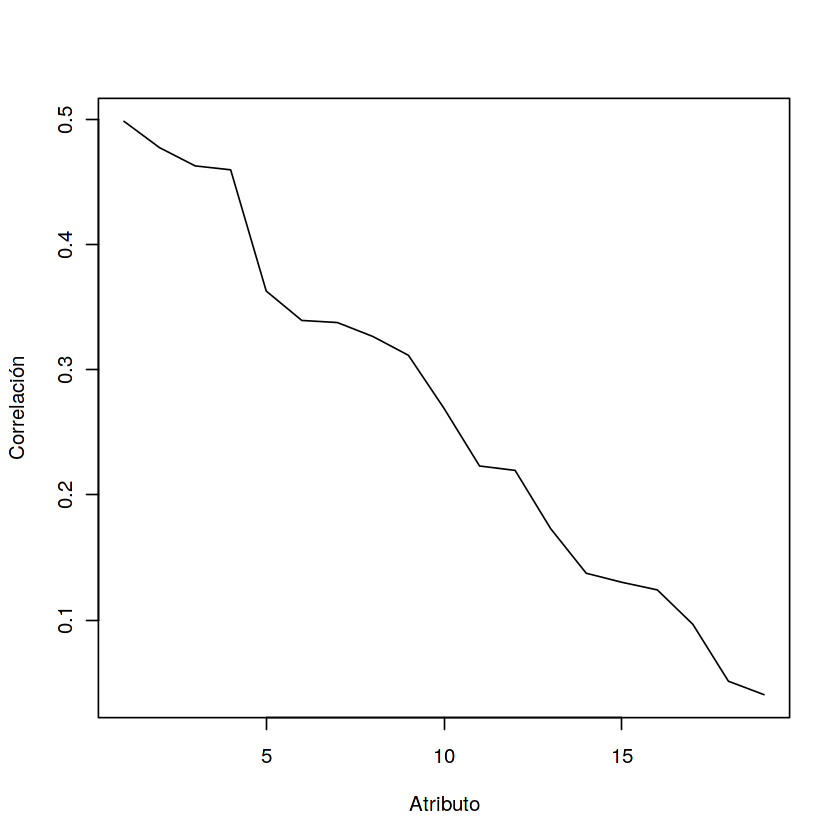

In [83]:
# Veamos qué atributos posiblemente podrían contribuir con la explicación de la variable objetivo, en este caso con la muerte del paciente
# Para ello veamos las correlaciones, utilizando pearson.
# Notemos que nos interesa el absoluto de la correlación, eventualmente tendremos correlaciones + y -

corr_dataP <- cor(dataImputed, dataImputed, method = "pearson")
cor_df<- data.frame(cor=corr_dataP[2:20,1], varn = names(corr_dataP[2:20,1])) 
cor_df<- cor_df%>%mutate(cor_abs = abs(cor)) %>% arrange(desc(cor_abs))
plot(cor_df$cor_abs, type="l", xlab="Atributo" , ylab="Correlación")

In [84]:
# Supongamos que nos interesa aquellos atributos que tengan una correlación superior a 0.20 en absoluto.
# Se podría escoger otro valor como umbral.

dataOverCorr <- cor_df %>% filter(cor_abs>0.20)
data_filtered <- data.frame(dataImputed) %>% select(class,one_of(as.character(dataOverCorr$varn)))
head(data_filtered)

,class,albumin,ascites,bilirubin,protime,spiders,malaise,histology,varices,fatigue,alk_phosphate,spleen_palpable,age
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,2,4.0,2,1.0,46.22182,2,2,1,2,2,85.0000,2,30
2,2,3.5,2,0.9,77.44621,2,2,1,2,1,135.0000,2,50
3,2,4.0,2,0.7,40.50593,2,2,1,2,1,96.0000,2,78
4,2,4.0,2,0.7,80.00000,2,2,1,2,2,46.0000,2,31
5,2,4.0,2,1.0,70.87725,2,2,1,2,2,61.6434,2,34
6,2,4.0,2,0.9,75.00000,2,2,1,2,2,95.0000,2,34


In [85]:
library(corrplot)

corrplot 0.84 loaded



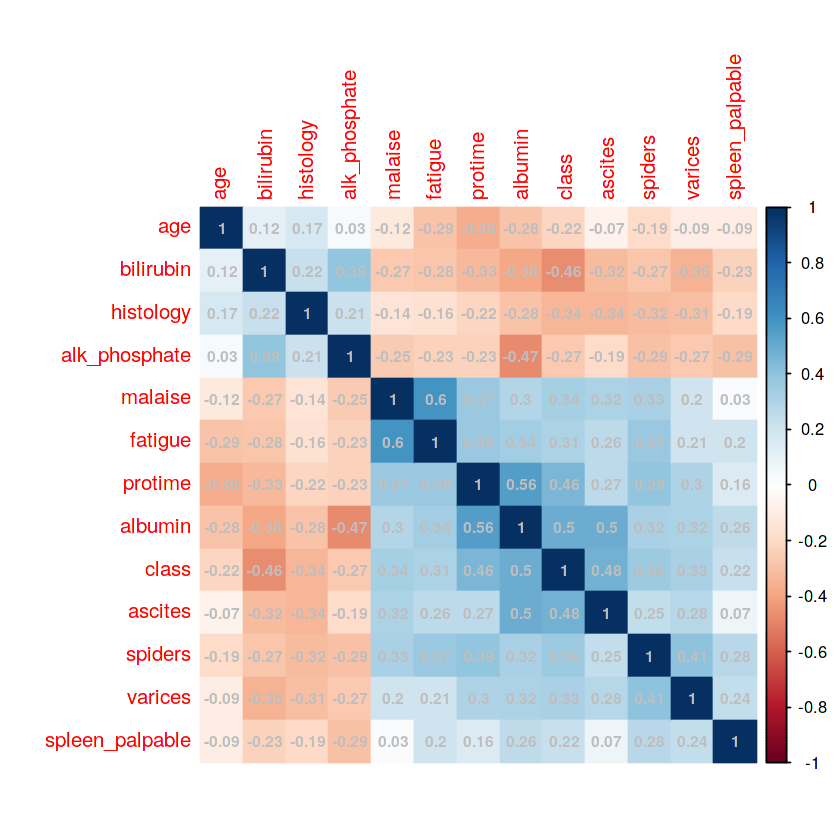

In [86]:
# Matriz de correlaciones
corrplot(cor(data_filtered), method = "color", addCoef.col="grey", order = "AOE",number.cex=0.75)

Notamos que hay una serie de variables medianamente correlacionadas, y que eventualmente podrían ocurrir una multicolinealidad a la hora de predecir la muerte del paciente.
Si observamos malaise con fatigue o bien ascites con spiders, podría sugerir una reducción en la dimensionalidad sin que perdamos la información, como es con la técnica del análisis de componentes principales.

# Análisis de componentes principales

In [87]:
# Dejamos la columna class fuera del df.
dataImputed.sub <- dataImputed[,c(2:20)]
# Creamos un objeto PCA
dataImputed.pca <- prcomp(dataImputed.sub , scale.=TRUE)

In [88]:
summary(dataImputed.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1369 1.31610 1.26091 1.16791 1.07799 1.02999 0.99050
Proportion of Variance 0.2403 0.09116 0.08368 0.07179 0.06116 0.05584 0.05164
Cumulative Proportion  0.2403 0.33149 0.41517 0.48696 0.54812 0.60396 0.65559
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.93621 0.88633 0.87480 0.83399 0.79578 0.76448 0.74170
Proportion of Variance 0.04613 0.04135 0.04028 0.03661 0.03333 0.03076 0.02895
Cumulative Proportion  0.70172 0.74307 0.78335 0.81995 0.85328 0.88404 0.91300
                          PC15    PC16    PC17    PC18   PC19
Standard deviation     0.64756 0.61853 0.58888 0.53468 0.4674
Proportion of Variance 0.02207 0.02014 0.01825 0.01505 0.0115
Cumulative Proportion  0.93507 0.95520 0.97345 0.98850 1.0000

Notamos que la componente PC1 explica aproximadamente del 24,03% de la varianza total y el resto de las componentes aportan valores menores al 10%. Por ende con el PC1 y PC2, sólo podemos obtener una explicación del 33% de la varianza.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



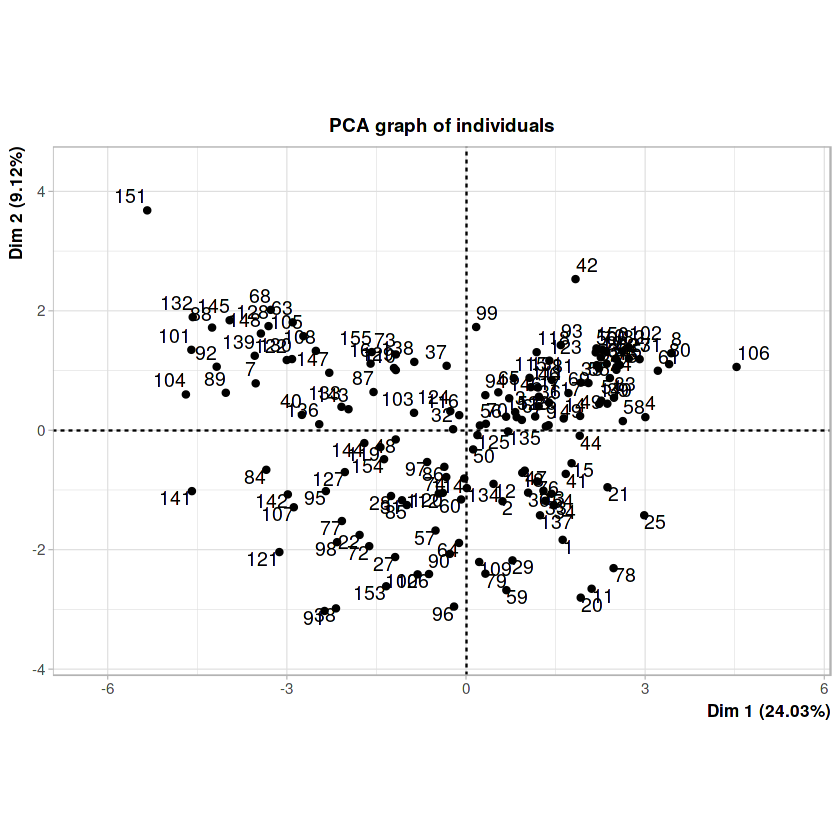

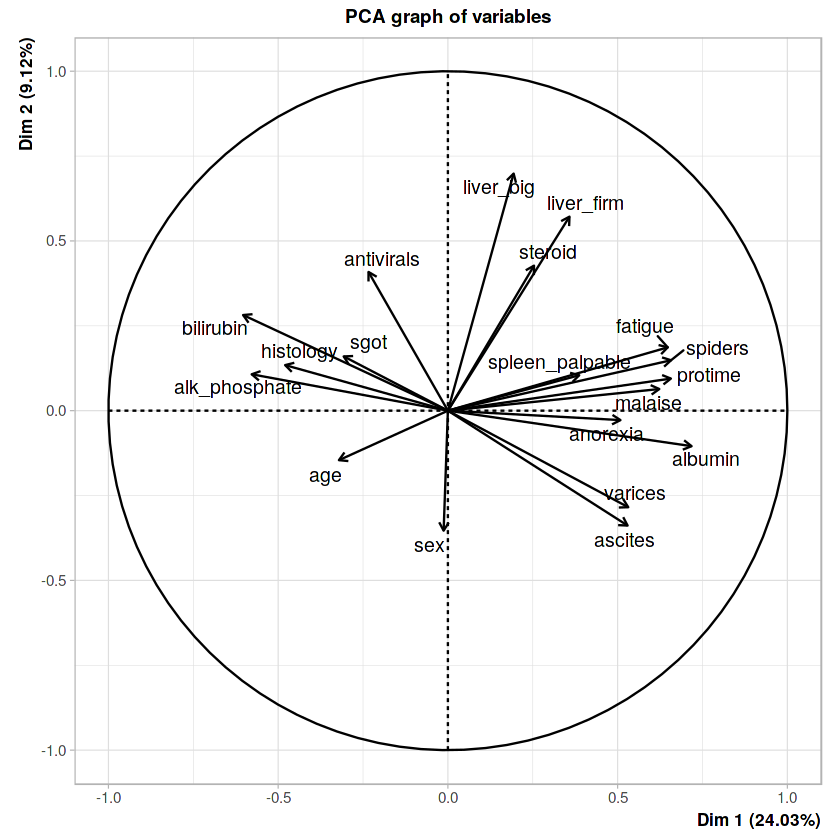

In [89]:
library("FactoMineR")
library("factoextra")
pca <- PCA(dataImputed.sub, scale.unit = TRUE, ncp = 8, graph = TRUE)

Del gráfico PCA de las variables, podemos notar un grupo de variables como albumin, protime, spiders, fatigue, malaise aportan de forma positiva al componente 1. Por otra parte bilirubin, histology, alk_phospate su influencia es de forma negativa al componente 1. Por otra parte, se puede notar que liver_big y liver_firm, contribuyen de forma positiva al componente 2.

In [90]:
get_eigenvalue(pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.5662010,24.032637,24.03264
Dim.2,1.7321302,9.116475,33.14911
Dim.3,1.5898893,8.367838,41.51695
Dim.4,1.3640068,7.178983,48.69593
Dim.5,1.1620596,6.116103,54.81204
Dim.6,1.0608698,5.583525,60.39556
Dim.7,0.9810968,5.163667,65.55923
Dim.8,0.8764816,4.613061,70.17229
Dim.9,0.7855722,4.134590,74.30688
Dim.10,0.7652720,4.027748,78.33463


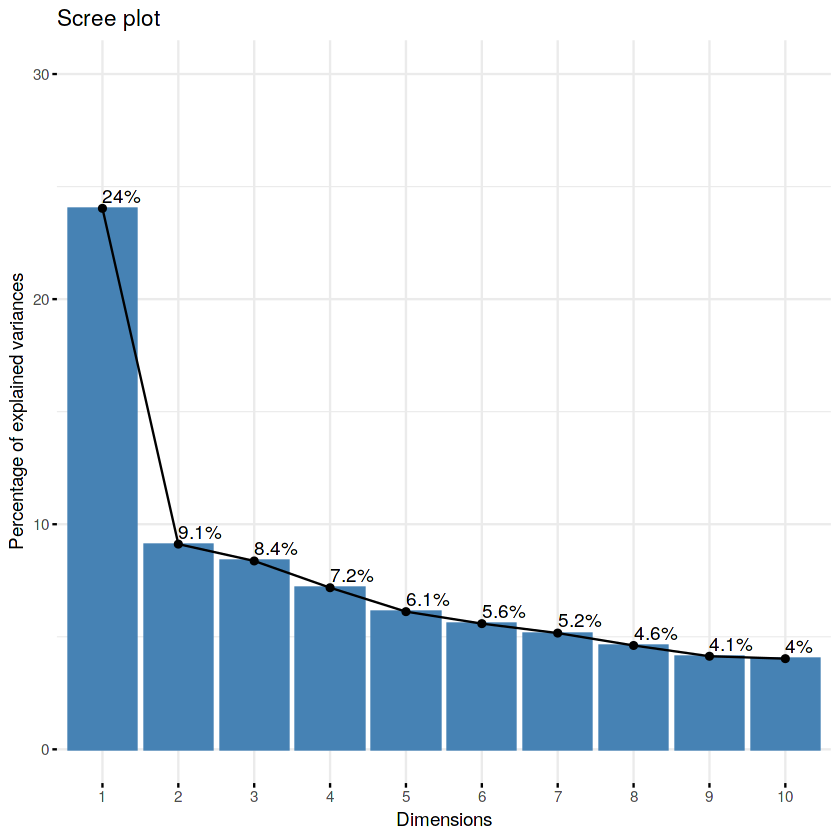

In [91]:
fviz_eig(pca, addlabels = TRUE, ylim = c(0, 30))

In [92]:
pca_var <- get_pca_var(pca)

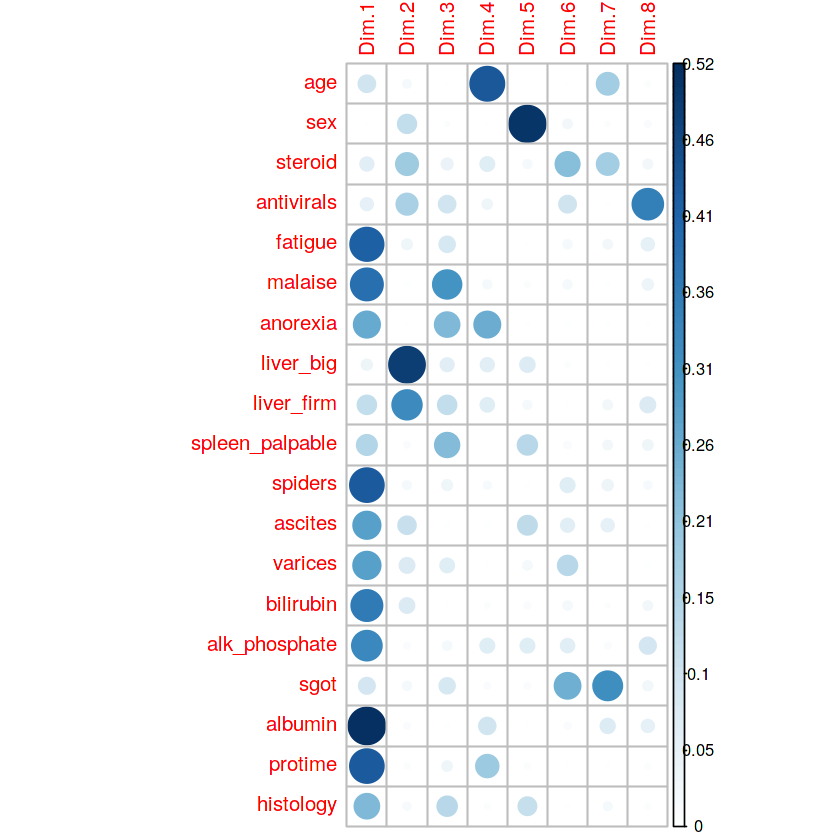

In [93]:
library("corrplot")
corrplot(pca_var$cos2, is.corr=FALSE)
# En la tabla se pueden notar las contribuciones de cada atributo a los componentes 1 y 2 graficados anteriormente.

In [94]:
head(pca_var$contrib, 19)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
age,2.255652041,1.22641898,0.021383213,32.108220464,0.006544315,0.07236464,1.823393e+01,0.9801088
sex,0.003440392,7.20938124,0.346355772,0.077677507,43.263243557,2.55568560,6.163804e-01,1.4047155
steroid,1.408936195,10.53352316,2.801162137,5.160675613,1.953737637,20.56439140,1.810115e+01,3.2277443
antivirals,1.197026258,9.63555504,6.428445912,2.351717244,0.016806396,9.87275140,1.488612e-01,40.4675826
fatigue,9.183199180,2.01023605,5.588306241,0.004589760,0.025835461,2.28775698,2.735420e+00,6.4195149
malaise,8.491719679,0.23493478,19.225680631,1.717507928,0.869856262,2.30039059,3.298400e-01,4.5620923
anorexia,5.657022530,0.04458345,14.380290566,18.679991982,0.150569277,0.26487866,4.376093e-01,0.1462227
liver_big,0.821343624,28.15621256,3.925602841,4.738042158,6.650943910,0.65114304,1.088442e-04,0.3581836
liver_firm,2.808692919,18.85710488,7.990913718,4.944447505,1.964433295,0.08286658,2.825177e+00,9.3637808
spleen_palpable,3.277084650,0.62937982,14.073607940,0.004203015,12.104532195,1.44460082,2.736476e+00,3.9221170


## PCA con variables no dicotómicas

In [95]:
# Creamos un nuevo DF sin las variables dicotomicas
dataOutBinary <- dataImputed[,c(2, 15:19)]

In [96]:
str(dataOutBinary)

'data.frame':	155 obs. of  6 variables:
 $ age          : int  30 50 78 31 34 34 51 23 39 30 ...
 $ bilirubin    : num  1 0.9 0.7 0.7 1 ...
 $ alk_phosphate: num  85 135 96 46 61.6 ...
 $ sgot         : num  18 42 32 52 200 ...
 $ albumin      : num  4 3.5 4 4 4 ...
 $ protime      : num  46.2 77.4 40.5 80 70.9 ...


In [97]:
dataOutBinary.pca <- prcomp(dataOutBinary, center = TRUE, scale.=TRUE)
summary(dataOutBinary.pca)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6
Standard deviation     1.5577 1.0473 0.9481 0.7908 0.7711 0.59808
Proportion of Variance 0.4044 0.1828 0.1498 0.1042 0.0991 0.05962
Cumulative Proportion  0.4044 0.5872 0.7370 0.8413 0.9404 1.00000

Si observamos, vemos que los PC1->PC4 explican el 84% la variabilidad, por lo que eventualmente podríamos descartar el PC5 y PC6.

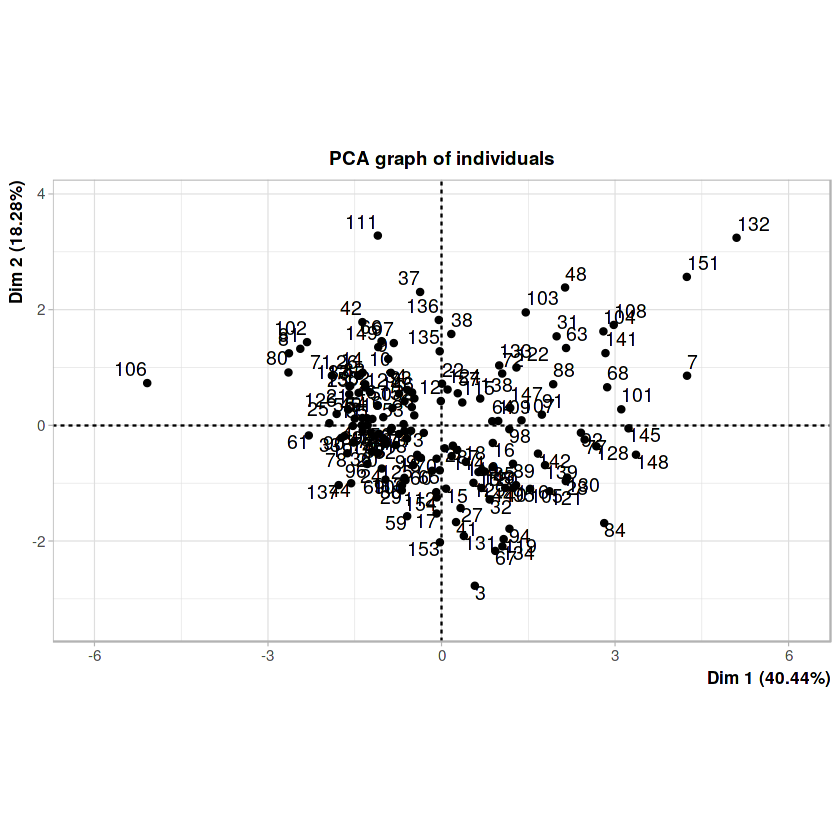

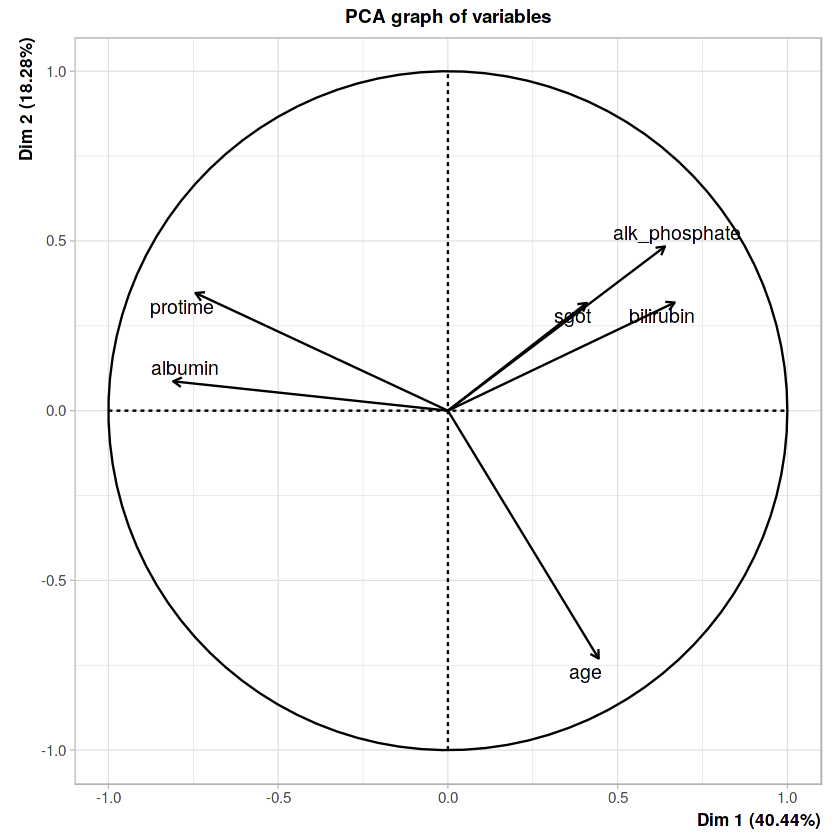

In [98]:
pca <- PCA(dataOutBinary, scale.unit = TRUE, ncp = 5, graph = TRUE)

In [99]:
get_eigenvalue(pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.4265844,40.443073,40.44307
Dim.2,1.0967476,18.279127,58.72220
Dim.3,0.8989399,14.982332,73.70453
Dim.4,0.6254430,10.424050,84.12858
Dim.5,0.5945890,9.909816,94.03840
Dim.6,0.3576962,5.961604,100.00000


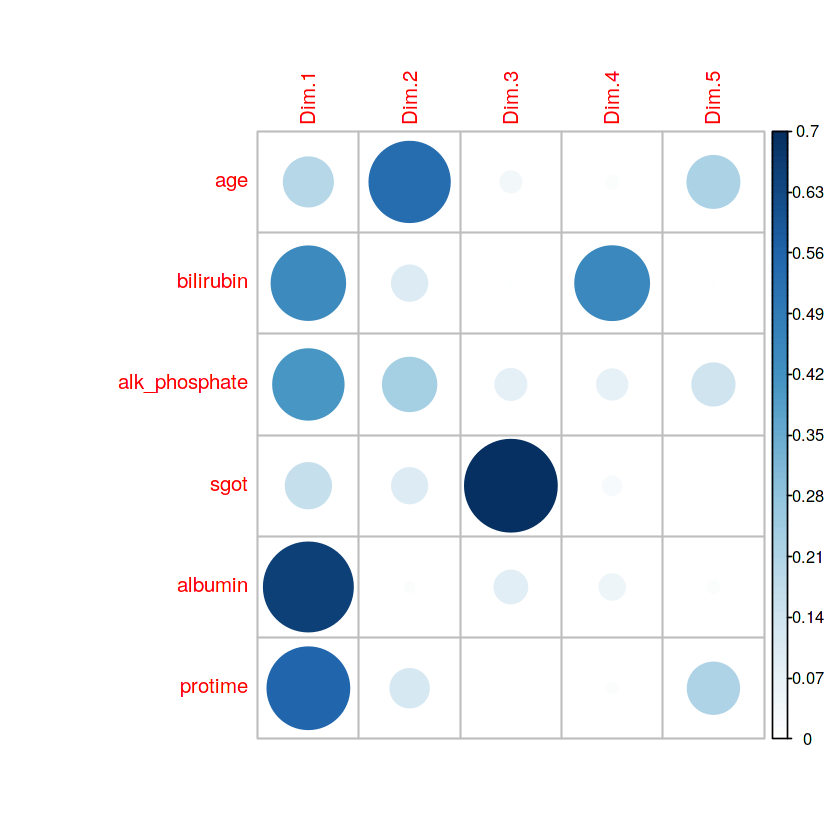

In [100]:
pca_var <- get_pca_var(pca)
library("corrplot")
corrplot(pca_var$cos2, is.corr=FALSE)

# Análisis de Factores Múltiples
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/116-mfa-multiple-factor-analysis-in-r-essentials/

Se define los siguientes grupos de análisis:

Descripción: Grupo 1 (2): sexo y edad -> correspondiente a características no bioquímicas

Condición: Grupo 2 (12): steroid, antivirals, fatigue, malaise, anorexia, liver big, liver firm, spleen palpable, spiders, ascites, varices, histology -> correspondiente a variables dicotómicas, y básicamente responden a la presencia o no de cada uno de estos estados.

Bioquímico: Grupo 3 (5): Bilirubin, Alk phosphate, sgot, albumin, protime-> variables continuas.

In [101]:
head(dataImputedNonConverted)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0000,18,4.0,46.22182,1
2,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0000,42,3.5,77.44621,1
3,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0000,32,4.0,40.50593,1
4,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0000,52,4.0,80.00000,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,61.6434,200,4.0,70.87725,1
6,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.0000,28,4.0,75.00000,1


In [102]:
# Cambiamos el orden las columnas para poder trabajar de mejor manera MFA
dataImputedNonConverted[15:20] <- dataImputedNonConverted[20:15]
colnames(dataImputedNonConverted)[15] = "histology"
colnames(dataImputedNonConverted)[20] = "bilirubin"
dataImputedMFA <- dataImputedNonConverted[,c(2:20)]
summary(dataImputedMFA)

      age            sex        steroid   antivirals    fatigue malaise
 Min.   : 7.0   Min.   :1.000   1:76    Min.   :1.000   1:100   1:61   
 1st Qu.:32.0   1st Qu.:1.000   2:79    1st Qu.:2.000   2: 55   2:94   
 Median :39.0   Median :1.000           Median :2.000                  
 Mean   :41.2   Mean   :1.103           Mean   :1.845                  
 3rd Qu.:50.0   3rd Qu.:1.000           3rd Qu.:2.000                  
 Max.   :78.0   Max.   :2.000           Max.   :2.000                  
 anorexia liver_big liver_firm spleen_palpable spiders ascites varices
 1: 33    1: 29     1:65       1: 31           1: 54   1: 22   1: 20  
 2:122    2:126     2:90       2:124           2:101   2:133   2:135  
                                                                      
                                                                      
                                                                      
                                                                      

In [103]:
#reformateamos los tipos factor
dataImputedMFA[,"antivirals"] <- factor(dataImputedMFA[,"antivirals"])
dataImputedMFA[,"histology"] <- factor(dataImputedMFA[,"histology"])

In [104]:
str(dataImputedMFA)

'data.frame':	155 obs. of  19 variables:
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : Factor w/ 2 levels "1","2": 2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 2 levels "1","2": 2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ histology      : Factor w/ 2 levels "1","2": 1 1 1 1 1 1

In [105]:
summary(dataImputedMFA)

      age            sex        steroid antivirals fatigue malaise anorexia
 Min.   : 7.0   Min.   :1.000   1:76    1: 24      1:100   1:61    1: 33   
 1st Qu.:32.0   1st Qu.:1.000   2:79    2:131      2: 55   2:94    2:122   
 Median :39.0   Median :1.000                                              
 Mean   :41.2   Mean   :1.103                                              
 3rd Qu.:50.0   3rd Qu.:1.000                                              
 Max.   :78.0   Max.   :2.000                                              
 liver_big liver_firm spleen_palpable spiders ascites varices histology
 1: 29     1:65       1: 31           1: 54   1: 22   1: 20   1:85     
 2:126     2:90       2:124           2:101   2:133   2:135   2:70     
                                                                       
                                                                       
                                                                       
                                    

In [106]:
# agrupamos
# n: valores categoricos
# s: valores cuantitativos
res.mfa <- MFA(dataImputedMFA, 
               group = c(2, 12, 5), 
               type = c("s", "n", "s"),
               name.group = c("Descripción","Condición","Bioquímico"),
               #num.group.sup = c(1, 3),
               graph = FALSE)

In [107]:
get_eigenvalue(res.mfa)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.788360e+00,2.238906e+01,22.38906
Dim.2,1.044468e+00,1.307604e+01,35.46510
Dim.3,9.276047e-01,1.161298e+01,47.07809
Dim.4,5.398123e-01,6.758086e+00,53.83617
Dim.5,5.186311e-01,6.492911e+00,60.32908
Dim.6,4.230133e-01,5.295841e+00,65.62492
Dim.7,3.739343e-01,4.681404e+00,70.30633
Dim.8,3.182062e-01,3.983727e+00,74.29006
Dim.9,2.968257e-01,3.716057e+00,78.00611
Dim.10,2.846873e-01,3.564092e+00,81.57020


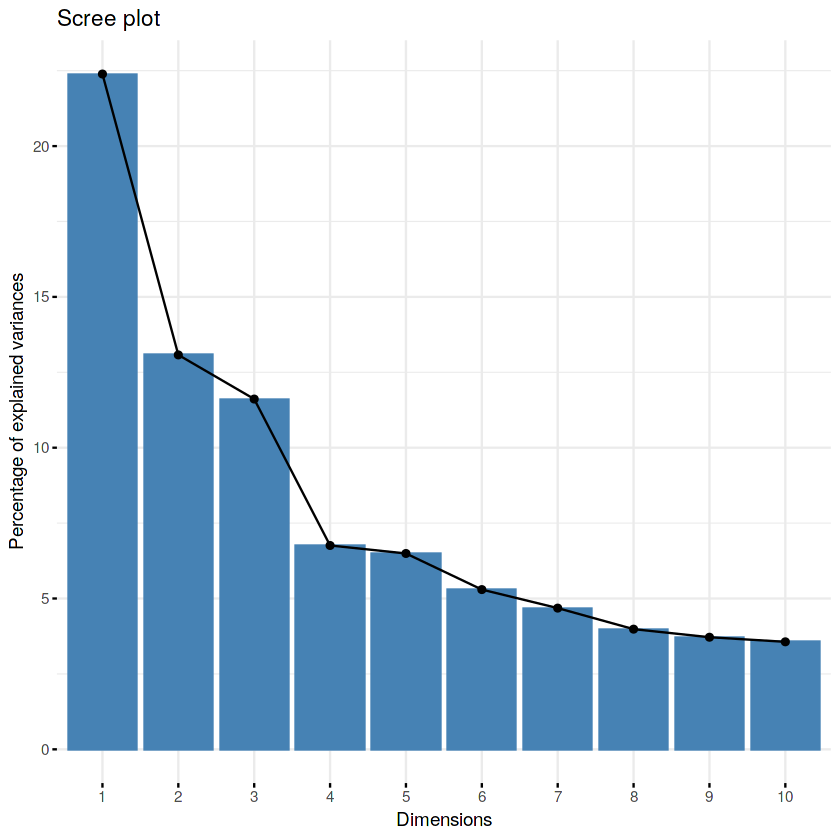

In [108]:
fviz_screeplot(res.mfa)

In [109]:
group <- get_mfa_var(res.mfa, "group")

In [110]:
# Cos2: quality of representation on the factore map
head(group$cos2)
# Contributions to the  dimensions
head(group$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Descripción,0.04273782,0.4540376365,0.237654672,0.0000135455,0.0001157264
Condición,0.27273752,0.0027955305,0.009940397,0.0868579249,0.1028158926
Bioquímico,0.43753469,0.0004931707,0.008134103,0.0117162137,0.0026154895


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Descripción,16.21681,90.503447,73.72668,0.9564654,2.909859
Condición,40.39495,7.002394,14.86786,75.5216745,85.522662
Bioquímico,43.38824,2.494159,11.40546,23.5218602,11.567479


In [111]:
quanti.var <- get_mfa_var(res.mfa, "quanti.var")

In [112]:
# Contributions to the dimensions
quanti.var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
age,16.16770431,2.0954166,69.4701736,0.11949546,0.3997036
sex,0.04910998,88.4080299,4.2565048,0.83696991,2.5101556
alk_phosphate,12.23215293,0.6349760,0.1881587,1.86065480,0.9372920
sgot,13.36969279,0.3213738,0.2182791,0.02620187,1.9261070
albumin,2.37864696,0.2594676,0.6555541,18.54566332,1.4305424
protime,7.08280055,0.1003256,7.1983514,0.68310682,4.0171502
bilirubin,8.32494369,1.1780163,3.1451139,2.40623337,3.2563873


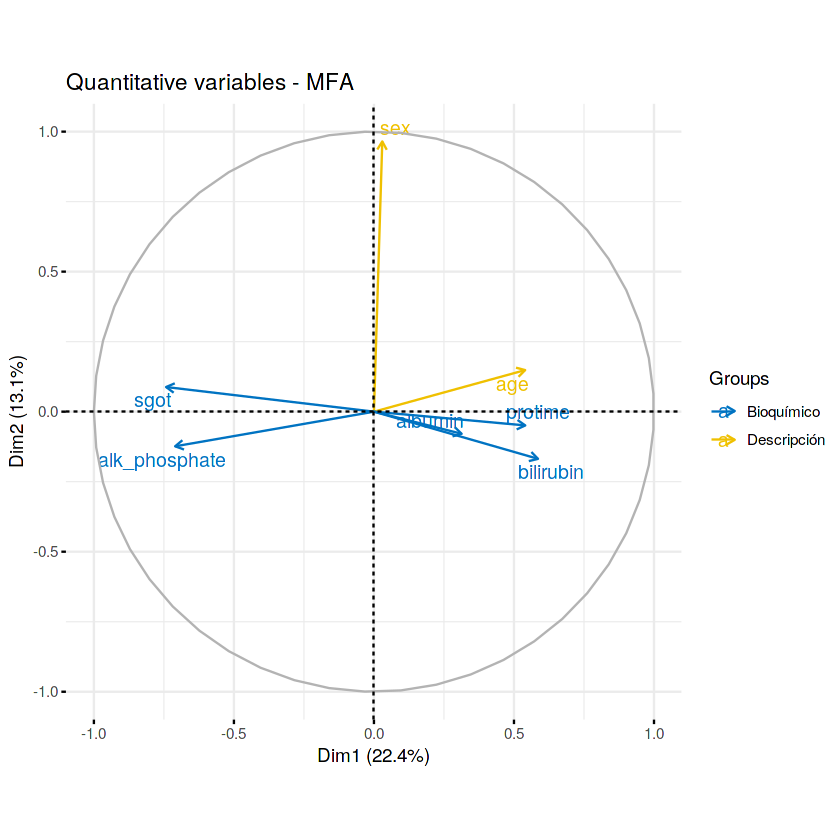

In [113]:
fviz_mfa_var(res.mfa, "quanti.var", palette = "jco", 
             col.var.sup = "violet", repel = TRUE)

In [114]:
quali.var <- get_mfa_var(res.mfa, "quali.var")

In [115]:
# Contributions to the dimensions
head(quali.var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
steroid_1,0.5989207,0.16943050,0.003252583,0.218130892,6.038654
steroid_2,0.5761769,0.16299643,0.003129067,0.209847441,5.809338
antivirals_1,0.5629516,1.06158159,0.844351431,0.041527177,9.093370
antivirals_2,0.1031362,0.19448823,0.154690339,0.007608032,1.665961
fatigue_1,2.4979513,0.07615421,0.043871338,0.164429202,2.286056
fatigue_2,4.5417296,0.13846219,0.079766069,0.298962186,4.156466


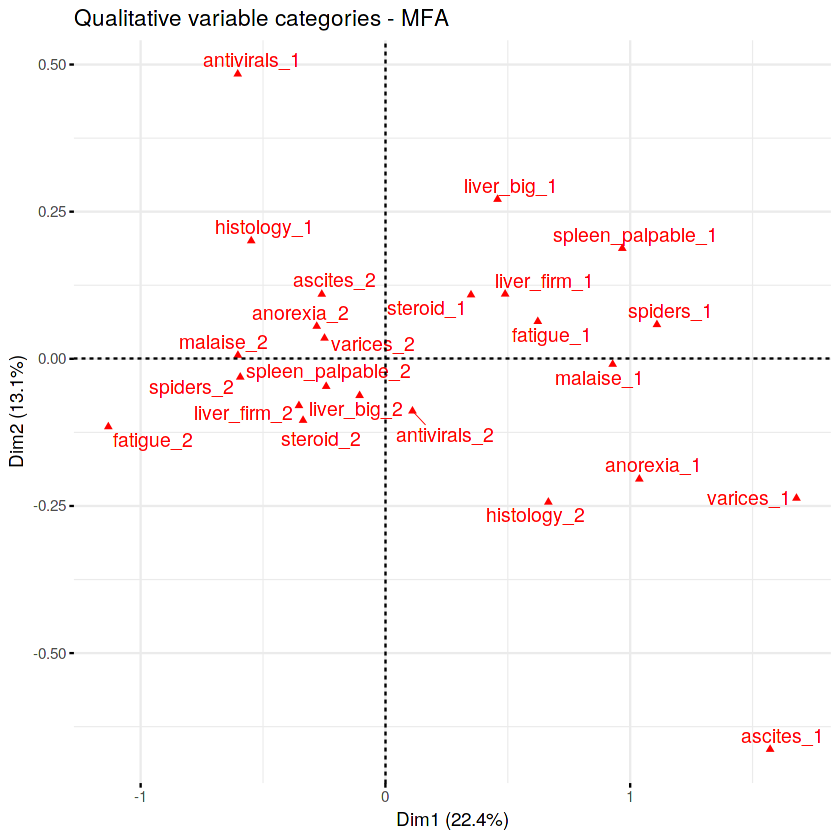

In [116]:
fviz_mfa_var(res.mfa, "quali.var", palette = "jco", 
             col.var.sup = "violet", repel = TRUE)